In [2]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

#Here are a set of libraries we imported to complete this assignment.
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random

random.seed(42)

In [106]:
EP = pd.read_csv('eoc_pulse.csv')
RF = pd.read_csv('revs.csv')
TO = pd.read_csv('time_overall.csv')
Len = pd.read_csv('thought.csv')

In [82]:
Len.head()

,student_id,thoughtfulness
0,001824fb-a2fd-431d-aef6-7a1250d97a62,23.323864
1,01bd8559-8276-4299-9ee4-248c4b4af2a9,24.342857
2,02b7468a-2c49-474d-8c6b-3188904fd85e,28.630682
3,0556b794-cd80-4af6-8cfa-8055462c215a,30.579545
4,059a058b-784a-4a5e-8688-11ee7c2dd5e7,31.579096


In [107]:
mean_thoughtfulness = Len['thoughtfulness'].mean()
print(mean_thoughtfulness)

24.91884642307511


In [108]:
merged_df = pd.merge(TO, EP, on='student_id')

In [109]:
merged_df = pd.merge(merged_df, RF, on = 'student_id')

In [110]:
#merged_df = pd.merge(merged_df, Len, on = 'student_id')

# Assuming merged_df is your merged DataFrame and you want to replace missing values with a value named 'replacement_value'
merged_df = pd.merge(merged_df, Len, on='student_id', how='left')  # Merge with left join to keep all entries in merged_df
merged_df['thoughtfulness'].fillna(0, inplace=True)  # Replace missing values with 'replacement_value'

In [111]:
merged_df.rename(columns={'0': 'Rev'}, inplace=True)

merged_df.head()

,student_id,engaged,class_id_x,Pulse,EOC,class_id_y,Rev,thoughtfulness
0,001824fb-a2fd-431d-aef6-7a1250d97a62,185561041.0,074123e7-cd90-4500-86fe-286aaa733bf5,4.159091,0.748087,074123e7-cd90-4500-86fe-286aaa733bf5,274,23.323864
1,0096491a-77bf-4e79-b906-fc7a8e5e57a6,158365058.0,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,4.431818,0.567986,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,27,0.000000
2,00fe5bb2-6b64-4a36-a706-eac4dc124ea7,93017434.0,51711479-441b-4c02-aef7-517aca63a53f,3.850000,0.849111,51711479-441b-4c02-aef7-517aca63a53f,34,0.000000
3,016e2fcf-0cc2-42ad-844d-e1057b5081cc,14547228.0,84444a0e-2905-46a8-bc93-5f566c0c1916,4.000000,0.854545,84444a0e-2905-46a8-bc93-5f566c0c1916,20,0.000000
4,01805fac-7187-40e3-8a7e-1dda3c6c87f2,62052885.0,cc1ffb2e-5555-4109-8ad8-2d49cb54ad10,3.666667,0.638054,cc1ffb2e-5555-4109-8ad8-2d49cb54ad10,11,0.000000


In [126]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming your data is stored in a DataFrame named 'merged_df' with columns 'ID', 'thoughtfulness', 'engaged', 'Pulse', 'EOC', 'Rev'
# Replace this with your actual data

# Define the columns for clustering
#columns_for_clustering = ['thoughtfulness', 'engaged', 'Pulse', 'EOC', 'Rev']
columns_for_clustering = ['engaged', 'Pulse', 'EOC']


# Normalize the values in the DataFrame
scaler = StandardScaler()
normalized_data = scaler.fit_transform(merged_df[columns_for_clustering])

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=columns_for_clustering)

# Define the values of k (number of clusters)
#k_values = [3, 4, 5, 6]
k_values = [3]


# Dictionary to store cluster labels for each value of k
cluster_labels_dict = {}

# Perform KMeans clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)  # Set n_init explicitly
    clusters = kmeans.fit_predict(normalized_df)
    
    # Store cluster labels in the dictionary
    cluster_labels_dict[k] = clusters

# Concatenate the ID column back to the clustered DataFrame for each value of k
for k, clusters in cluster_labels_dict.items():
    clustered_df = pd.concat([merged_df['student_id'], pd.DataFrame({'Cluster_' + str(k): clusters})], axis=1)
    print(f"\nClustered DataFrame for k={k}:")
    print(clustered_df.head())


C:\Users\jiper\Conda\envs\datafest\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(



Clustered DataFrame for k=3:
                             student_id  Cluster_3
0  001824fb-a2fd-431d-aef6-7a1250d97a62          0
1  0096491a-77bf-4e79-b906-fc7a8e5e57a6          0
2  00fe5bb2-6b64-4a36-a706-eac4dc124ea7          1
3  016e2fcf-0cc2-42ad-844d-e1057b5081cc          1
4  01805fac-7187-40e3-8a7e-1dda3c6c87f2          2


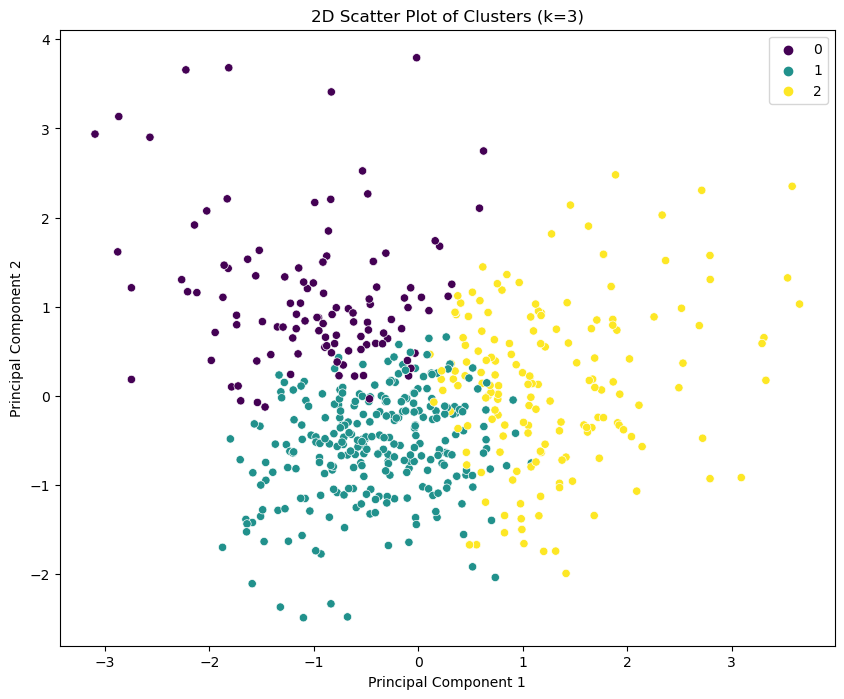

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Perform PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
components = pca.fit_transform(normalized_df)

# Plot the 2D scatter plot with cluster labels
plt.figure(figsize=(10, 8))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=cluster_labels_dict[3], palette='viridis', legend='full')
plt.title('2D Scatter Plot of Clusters (k=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [129]:
print("Principal components:")
print(pca.components_)
#columns_for_clustering = ['thoughtfulness', 'engaged', 'Pulse', 'EOC', 'Rev']

Principal components:
[[-0.49108088 -0.53314312 -0.68891072]
 [ 0.74213054 -0.67017508 -0.01037417]]


In [130]:
# Assuming 'merged_df' contains your DataFrame with columns 'ID', 'thoughtfulness', 'engaged', 'Pulse', 'EOC', 'Rev', and 'Cluster'
# Replace this with your actual DataFrame

# Add the 'Cluster' column to merged_df
merged_df['Cluster'] = cluster_labels_dict[k]

# Now merged_df contains the 'Cluster' column with cluster labels
merged_df.head()

,student_id,engaged,class_id_x,Pulse,EOC,class_id_y,Rev,thoughtfulness,Cluster
0,001824fb-a2fd-431d-aef6-7a1250d97a62,185561041.0,074123e7-cd90-4500-86fe-286aaa733bf5,4.159091,0.748087,074123e7-cd90-4500-86fe-286aaa733bf5,274,23.323864,0
1,0096491a-77bf-4e79-b906-fc7a8e5e57a6,158365058.0,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,4.431818,0.567986,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,27,0.000000,0
2,00fe5bb2-6b64-4a36-a706-eac4dc124ea7,93017434.0,51711479-441b-4c02-aef7-517aca63a53f,3.850000,0.849111,51711479-441b-4c02-aef7-517aca63a53f,34,0.000000,1
3,016e2fcf-0cc2-42ad-844d-e1057b5081cc,14547228.0,84444a0e-2905-46a8-bc93-5f566c0c1916,4.000000,0.854545,84444a0e-2905-46a8-bc93-5f566c0c1916,20,0.000000,1
4,01805fac-7187-40e3-8a7e-1dda3c6c87f2,62052885.0,cc1ffb2e-5555-4109-8ad8-2d49cb54ad10,3.666667,0.638054,cc1ffb2e-5555-4109-8ad8-2d49cb54ad10,11,0.000000,2


In [131]:
# Assuming 'merged_df' contains your DataFrame with a column named 'Cluster'
# Replace this with your actual DataFrame

# Get unique cluster values
unique_clusters = merged_df['Cluster'].unique()

# Print unique cluster values
print("Unique Cluster Values:", unique_clusters)


Unique Cluster Values: [0 1 2]


In [132]:
# Assuming 'merged_df' contains your original DataFrame

# Define the columns to keep
columns_to_keep = ['thoughtfulness', 'engaged', 'Pulse', 'EOC', 'Rev', 'Cluster', 'student_id']

# Create a new DataFrame with the specified columns
df = merged_df[columns_to_keep].copy()

# Print the first few rows of the new DataFrame
df.head()

,thoughtfulness,engaged,Pulse,EOC,Rev,Cluster,student_id
0,23.323864,185561041.0,4.159091,0.748087,274,0,001824fb-a2fd-431d-aef6-7a1250d97a62
1,0.000000,158365058.0,4.431818,0.567986,27,0,0096491a-77bf-4e79-b906-fc7a8e5e57a6
2,0.000000,93017434.0,3.850000,0.849111,34,1,00fe5bb2-6b64-4a36-a706-eac4dc124ea7
3,0.000000,14547228.0,4.000000,0.854545,20,1,016e2fcf-0cc2-42ad-844d-e1057b5081cc
4,0.000000,62052885.0,3.666667,0.638054,11,2,01805fac-7187-40e3-8a7e-1dda3c6c87f2


C:\Users\jiper\Conda\envs\datafest\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


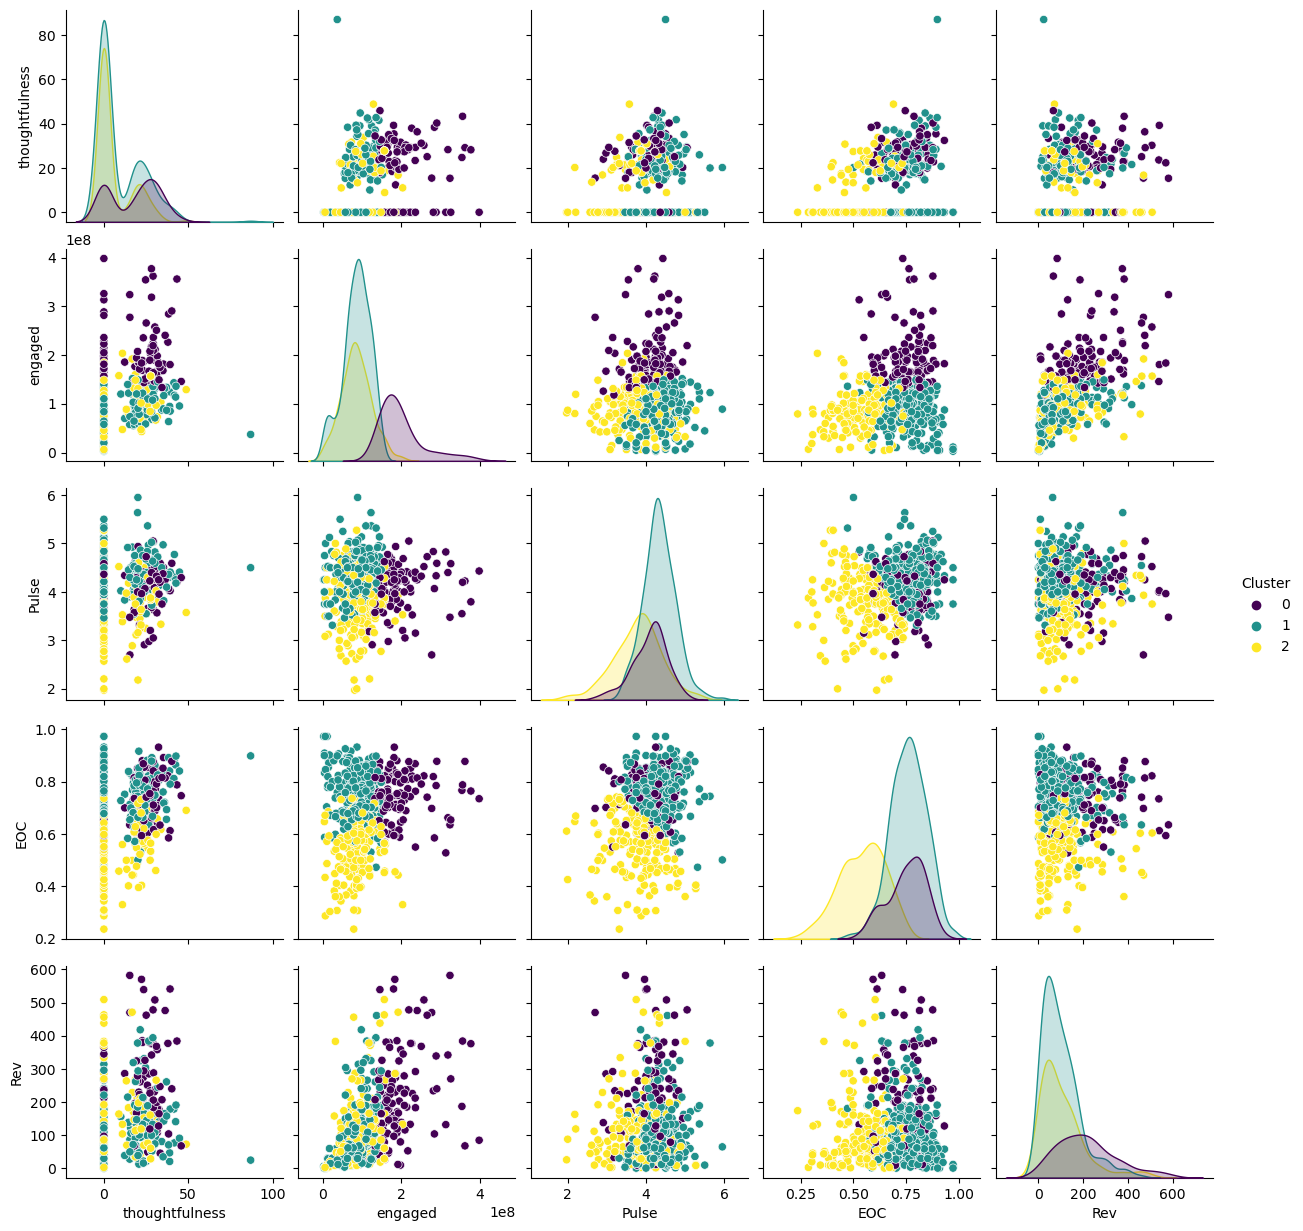

In [134]:
import seaborn as sns

# Define the columns for pair plotting
columns_for_pairplot = ['thoughtfulness', 'engaged', 'Pulse', 'EOC', 'Rev']

# Create pair plot with color-coded clusters
sns.pairplot(df[columns_for_pairplot + ['Cluster']], hue='Cluster', palette='viridis')
plt.show()


C:\Users\jiper\Conda\envs\datafest\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\jiper\Conda\envs\datafest\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


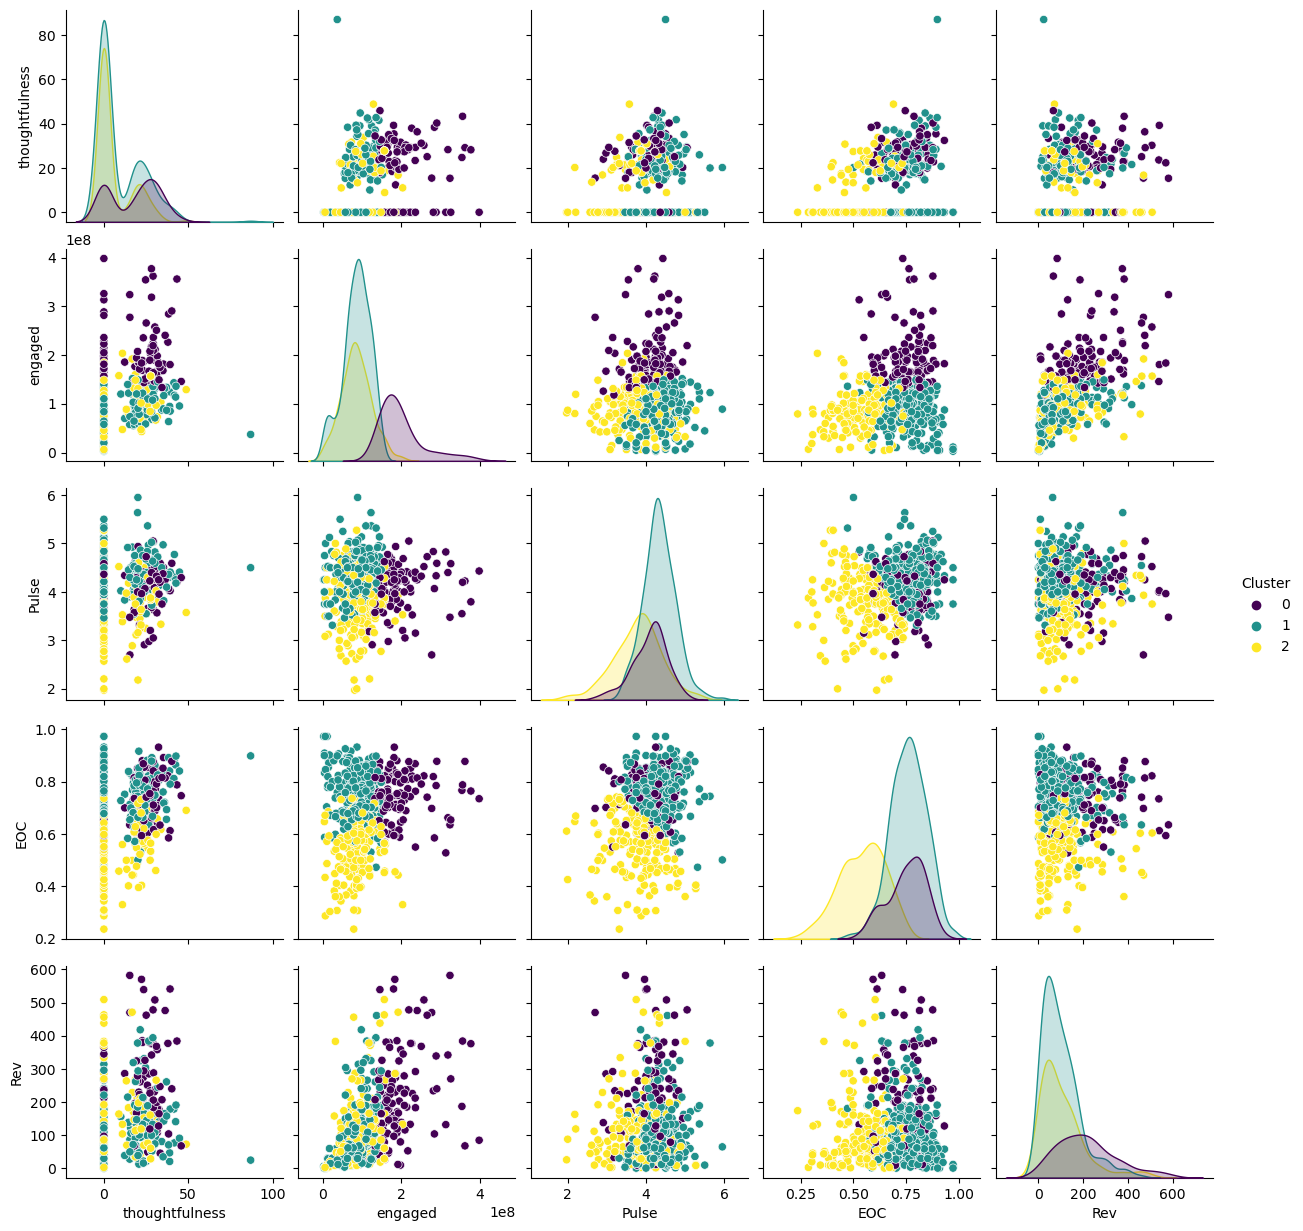

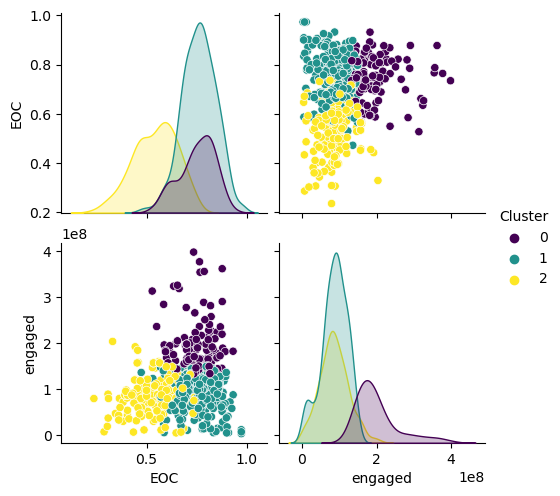

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns for pair plotting
columns_for_pairplot = ['thoughtfulness', 'engaged', 'Pulse', 'EOC', 'Rev']

# Create pair plot with color-coded clusters
pairplot = sns.pairplot(df[columns_for_pairplot + ['Cluster']], hue='Cluster', palette='viridis')

# Define the indices of the subplot you want to extract
i, j = 3, 1  # Example indices, adjust as needed

# Extracting the variables for the subplot at index (i, j)
var1 = columns_for_pairplot[i]
var2 = columns_for_pairplot[j]

# Create a new pairplot with only the specified variables
specific_pairplot = sns.pairplot(df, vars=[var1, var2], hue='Cluster', palette='viridis')

# Displaying the extracted subplot
plt.show()

In [135]:
df.to_csv('cluster_data.csv', index=False)


In [4]:
media_vews = pd.read_csv('media_views.csv')
data = pd.read_csv('cluster_data.csv')


In [6]:
new = pd.merge(media_vews, data, on = 'student_id')

In [9]:
new.describe()

,chapter_number,section_number,media_id,access_count,proportion_video,proportion_time,thoughtfulness,engaged,Pulse,EOC,Rev,Cluster
count,2655.000000,2655.000000,2.655000e+03,654.000000,654.000000,654.000000,2655.000000,2.655000e+03,2655.000000,2655.000000,2655.000000,2655.000000
mean,4.609793,5.253484,3.797736e+08,1.102446,0.737313,0.781706,10.345587,1.155514e+08,4.101099,0.682194,131.290019,1.112618
std,0.487888,3.187934,1.115522e+06,0.341459,0.373426,0.460854,13.224428,5.799790e+07,0.558563,0.135480,110.307911,0.731807
min,4.000000,2.000000,3.790609e+08,1.000000,0.000000,0.000000,0.000000,4.464258e+06,1.972222,0.236000,1.000000,0.000000
25%,4.000000,2.000000,3.791501e+08,1.000000,0.511676,0.522942,0.000000,7.798482e+07,3.805556,0.598778,49.000000,1.000000
50%,5.000000,4.000000,3.793194e+08,1.000000,0.999778,0.999778,0.000000,1.020228e+08,4.181818,0.703706,105.000000,1.000000
75%,5.000000,9.000000,3.793196e+08,1.000000,0.999832,0.999841,21.737143,1.440957e+08,4.431818,0.787276,177.000000,2.000000
max,5.000000,9.000000,3.819747e+08,3.000000,1.000000,2.999524,48.801262,3.981791e+08,5.950000,0.932228,582.000000,2.000000


In [13]:
cluster_means = new.groupby('Cluster')['proportion_video'].mean()
print(cluster_means)


Cluster
0    0.864342
1    0.711212
2    0.629997
Name: proportion_video, dtype: float64
